In [207]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
from scipy.io import loadmat
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, Normalize
#from matplotlib.ticker import MaxNLocator
from matplotlib.patches import Rectangle
from matplotlib import cm

In [171]:
chromosome = 10
data = loadmat(f"matlab/output/chr{chromosome}.mat")["data"]

In [172]:
c = [
    "#3182bd",
    "#e6550d",
    "#31a354",
    "#756bb1",
    "#9e9ac8",
    "#bcbddc",
    "#dadaeb",
    "#636363",
    "#969696",
    "#bdbdbd",
    "#d9d9d9",
];

In [173]:
def plot_modules(ax, node_set, cmap=None, **kwargs):
    modules = node_set.module.unique()
    sizes = node_set.module.value_counts()
    
    for i, module in enumerate(sizes.index):
        nodes = sorted(node_set[node_set.module == module].node)
        start, *nodes = nodes
        prev = start
        
        for node in nodes:
            if node != prev + 1 or node == nodes[-1]:
                patch = Rectangle((start, start), prev-start, prev-start,
                                  edgecolor=cmap[i],
                                  facecolor=cmap[i],
                                  linewidth=1,
                                  **kwargs
                                 )
                ax.add_patch(patch)
                start = prev = node
            else:
                prev = node

In [217]:
def plot_heatmap(gamma, **kwargs):
    ax = sns.heatmap(data, robust=True, annot=False, linewidths=0, norm=LogNorm(), square=True, xticklabels=100, yticklabels=100, cmap="gray_r", **kwargs)

    cmap = cm.get_cmap("tab20c")
    c = list(cmap(i) for i in [12, 4, 8, 0])
    
    significant = pd.read_csv(f"output/A1_chr{chromosome}_gamma{gamma}_significant_0.csv");
    insignificant = pd.read_csv(f"output/A1_chr{chromosome}_gamma{gamma}_insignificant_0.csv");
    plot_modules(ax, significant, c, linestyle="-", alpha=0.7)
    plot_modules(ax, insignificant, c, linestyle=":", alpha=1, fill=False)

    fig = ax.get_figure()
    fig.set_tight_layout(True)
    
    return ax

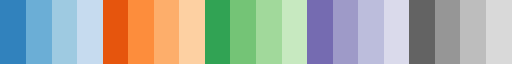

In [198]:
c = cm.get_cmap("tab20c")
c

In [175]:
def save_fig(fig, gamma):
    fig.savefig(f"results/chr{chromosome}_gamma{gamma}.png", dpi=600, bbox_inches="tight")

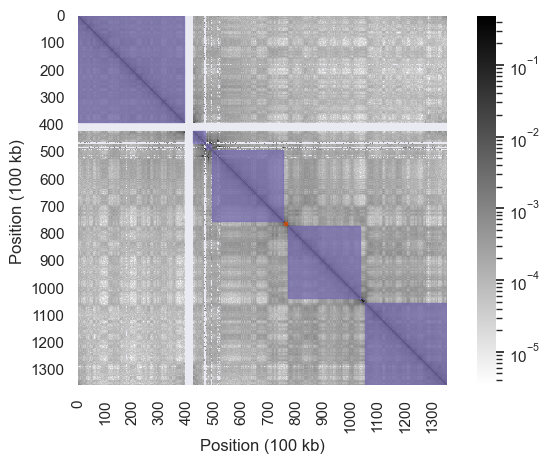

In [213]:
gamma = 50
ax = plot_heatmap(gamma, cbar=True)
ax.set_xlabel("Position (100 kb)")
ax.set_ylabel("Position (100 kb)")
save_fig(ax.get_figure(), gamma)

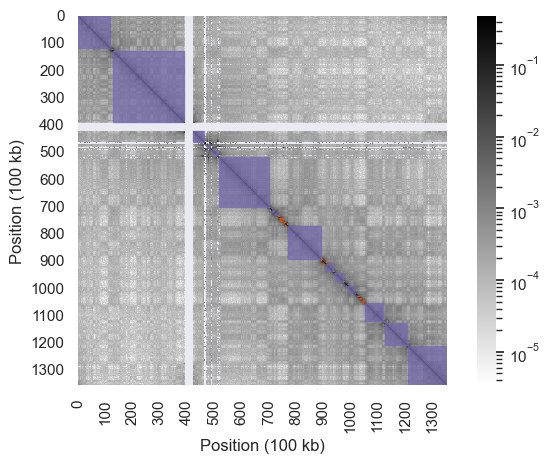

In [214]:
gamma = 55
ax = plot_heatmap(gamma, cbar=True)
ax.set_xlabel("Position (100 kb)")
ax.set_ylabel("Position (100 kb)")
save_fig(ax.get_figure(), gamma)

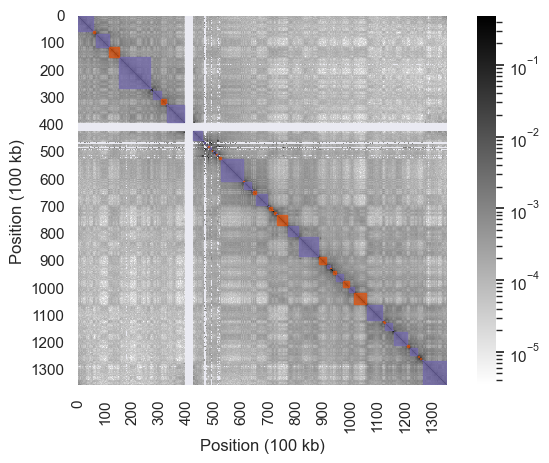

In [215]:
gamma = 60
ax = plot_heatmap(gamma, cbar=True)
ax.set_xlabel("Position (100 kb)")
ax.set_ylabel("Position (100 kb)")
save_fig(ax.get_figure(), gamma)

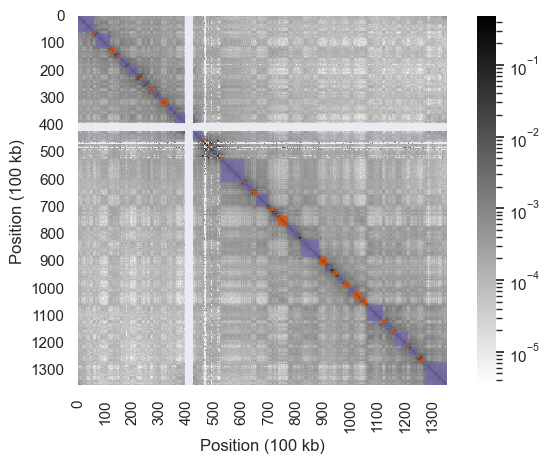

In [218]:
gamma = 65
ax = plot_heatmap(gamma, cbar=True)
ax.set_xlabel("Position (100 kb)")
ax.set_ylabel("Position (100 kb)")
save_fig(ax.get_figure(), gamma)